YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


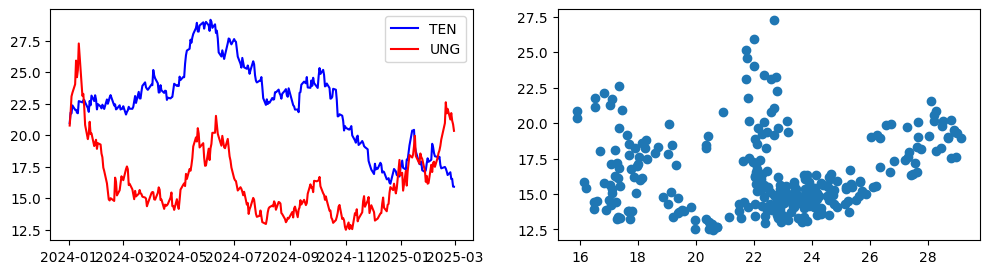

                            OLS Regression Results                            
Dep. Variable:                    TEN   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.022
Date:                Sun, 02 Mar 2025   Prob (F-statistic):              0.313
Time:                        23:39:34   Log-Likelihood:                -758.36
No. Observations:                 291   AIC:                             1521.
Df Residuals:                     289   BIC:                             1528.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.2854      1.167     18.246      0.0

(np.float64(-0.41049188813212906),
 np.float64(0.9083322143565514),
 0,
 290,
 {'1%': np.float64(-3.453102162983312),
  '5%': np.float64(-2.871558538275452),
  '10%': np.float64(-2.5721082282996433)},
 np.float64(375.29994789410677))

In [1]:
from os import name
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller


startdate = '2024-01-01'

TEN = yf.download('TEN', start=startdate )
UNG = yf.download('UNG', start=startdate )
TEN_cls = TEN['Close']
UNG_cls = UNG['Close']

fig,axes = plt.subplots(1,2,figsize=[12,3])
axes[0].plot(TEN_cls,'b')
axes[0].plot(UNG_cls,'r')
axes[0].legend(['TEN','UNG'])
axes[1].scatter(TEN_cls.values, UNG_cls.values)

plt.show()

UNG_cls=sm.add_constant(UNG_cls)
reg = sm.OLS(TEN_cls,UNG_cls).fit()
print(reg.summary())

resid = reg.resid
adfuller(resid)